#  Avacado Price Prediction Problem (Regression)

# Table of Content

1. [Problem Statement](#Section1)<br>
2. [Dataset Loading and it's Description](#Section2)<br>
   2.1 [Importing Packages](#Section201)<br>
   2.2 [Importing Dataset](#Section202)<br>
3. [ Data Pre-processing and Cleaning](#Section3)<br>
4. [Exploratory Data Analysis](#Section4)<br>
   4.1 [EDA Conclusions](#Section401)<br>
5. [Creating dummies for categorical variables](#Section5)<br>
6. [Splitting X and y into training and test datasets.](#Section6)<br>
7. [Data Scaling](#Section7)<br>
8. [Linear Regression Model](#Section8)<br>
9. [Decision Tree](#Section9)<br>
     9.1 [Decision Tree Model 1](#Section901)<br>
     9.2 [Decision Tree Model 2](#Section902)<br>
     9.3 [Decision Tree Model 3 (with Grid Search CV)](#Section903)<br>
10. [Random Forest Model](#Section10)<br>
     10.1 [Random Forest Model 1](#Section1001)<br>
     10.2 [Random Forest Model 2](#Section1002)<br>
     10.3 [Random Forest Model 3 (with Grid Search CV)](#Section1003)<br>  
11. [Model Evaluation Results](#Section11)<br>
12. [Conclusions](#Section12)<br>


<a name = Section1></a>
# 1. Problem Statement

 - Avacard-corp avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.

 - With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.

 - Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.

 - They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.

 - Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.

 - Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.

 - Our task is to predict the optimal price of the avocado using the previous sales data of avocado according to different regions.

<a name = Section2></a>
# 2. Dataset Loading and it's Description

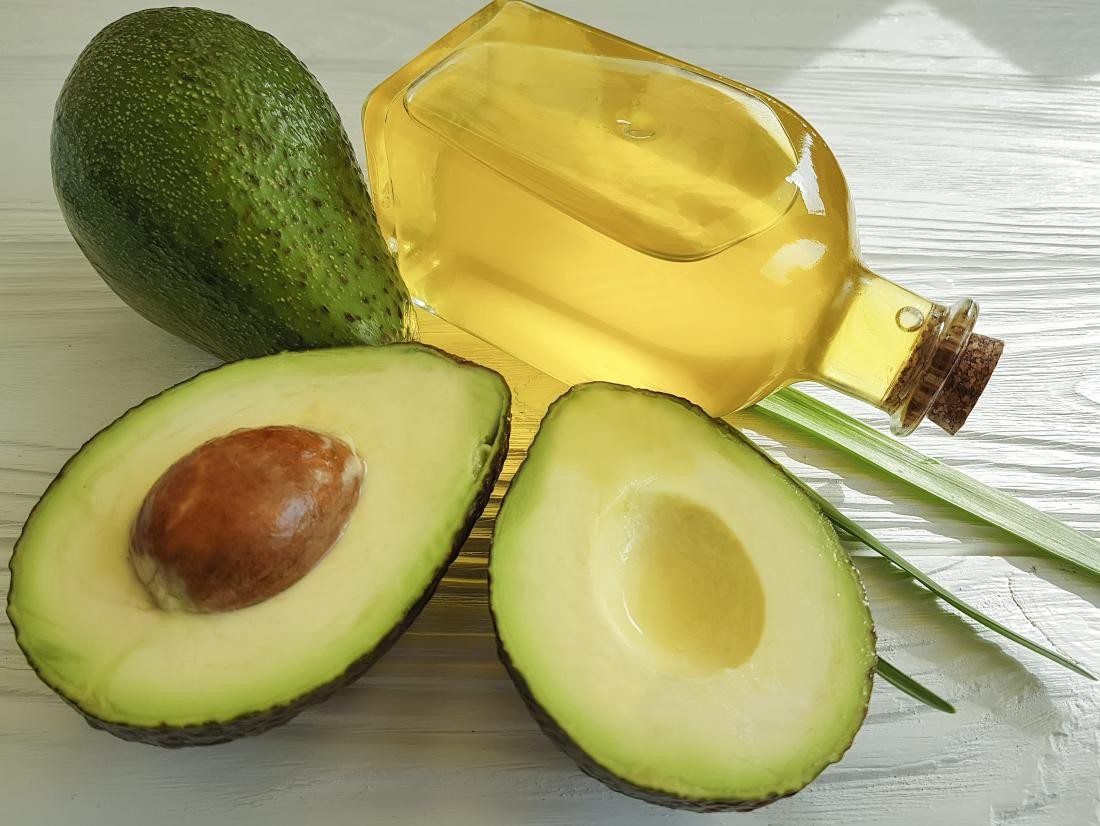


Dataset link : https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv

|Feature        |	Description                                               |
|---------------| ------------------------------------------------------------| 
|Id	            |   Unique identity of each observation.                      |
| Date 	        |   The date of the observation                               |
| Average Price |   The average price of a single avocado - target variable   |
| Total Volume  |   Total number of avocados sold                             | 
| 4046          |   Total number of avocados with PLU 4046 sold               | 
| 4225          |   Total number of avocados with PLU 4225 sold               |
| 4770          |   Total number of avocados with PLU 4770 sold               |
| Total Bags    |   Total number of bags sold.                                |
| Small Bags    |   Total number of small bags sold.                          |   
| Large Bags    |   Total number of avocados with PLU 4046 sold               | 
| XLarge Bags   |   Total number of avocados with PLU 4225 sold               |
| type          |   Conventional or Organic                                   |
| year 	        |   The year                                                  |
| region 	    |   The city or region of the observation                     |
  

The product/price lookup code (PLU) uniquely identifies a product (mainly produce).
- 4046: non-organic small/medium Hass Avocados (~3-5 oz)
- 4225: non-organic large Hass Avocados (~8-10 oz)
- 4770: non-organic extra large Hass Avocados (~10-15 oz)
----
- The dataset contains weekly retail scan data for National Retail Volume (units) and price.

- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

- The column AveragePrice is the average price of a single avocado.

- This is the data that we have to predict for future samples.

<a name = Section201></a>
## 2.1 Importing Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import plotly.graph_objs as go
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')

I am importing all the libraries which I would require for EDA, visualization, prediction and finding all metrics. The reason of doing this is that it become easier to use all the import statement at one go and we do not require to import the statement again at each point.

<a name = Section202></a>
## 2.2 Importing Dataset

- I am going to import dataset from the Insaid2018 account on Github and checking the top 5 rows using df.head().

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv",index_col=0)
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [3]:
df.shape

(18249, 13)

- We have imported the Avacado dataset in our Jupyter notebook. It consists of 18249 rows and 13 columns initially.

In [4]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

- Using .describe(), we got a detailed description of all columns and their data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


- Well, as a first observation we can see that we are lucky, we don't have any missing values (18249 complete data and 13 columns). Now let's do some Feature Engineering and Data Cleaning to make our analysis easier.

<a name = Section3></a>
# 3. Data Pre-processing and Cleaning

- Extracting Day, Month and Year from the Date column. By doing this we can perform deeper analysis on the dataset.

In [6]:

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

- Renaming some column for better uniformity and understanding.

In [7]:

df.rename(columns = {'type':'Type','AveragePrice':'Average Price','4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770','year':'Year','region':'Region'}, inplace = True)

- Now, we are adding another column in our dataset called "Season" extracted from the 'Month' column, so that we can divide the 12 months into 4 seasons: Summer, Winter, Autumn and Spring. For that we are defining an user defined function.

In [8]:
def season(Month):
    if(Month ==12 or Month==1 or Month==2):
        return 'Winter'
    elif(Month ==3 or Month==4 or Month==5):
        return 'Spring'
    elif(Month ==6 or Month==7 or Month==8):
        return 'Summer'
    else:
        return 'Autumn'

- Now, let's apply the defined function on the Month column and save it's return value in another newly defined column "Season"

In [9]:
df['Season']=df['Month'].apply(season)

- Verifying the addition of new column in our df dataset

In [10]:
df.head()

Date  Average Price  Total Volume  PLU_4046   PLU_4225  PLU_4770  \
0 2015-12-27           1.33      64236.62   1036.74   54454.85     48.16   
1 2015-12-20           1.35      54876.98    674.28   44638.81     58.33   
2 2015-12-13           0.93     118220.22    794.70  109149.67    130.50   
3 2015-12-06           1.08      78992.15   1132.00   71976.41     72.58   
4 2015-11-29           1.28      51039.60    941.48   43838.39     75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          Type  Year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   Region  Month  Day  Season  
0  Albany     12   27  Winter  
1  Albany     12   20  Winter  
2  Albany     12   13  Winter  
3  Albany     12    6  Winter  
4  Albany     11   29  Autumn

Now, let's do some exploratory data analysis on our data and extract some insights and pattern from it.

<a name = Section4></a>
# 4. Exploratory Data Analysis

### Q1. How price is distributed over the date column?

Text(0, 0.5, 'Avg Price')

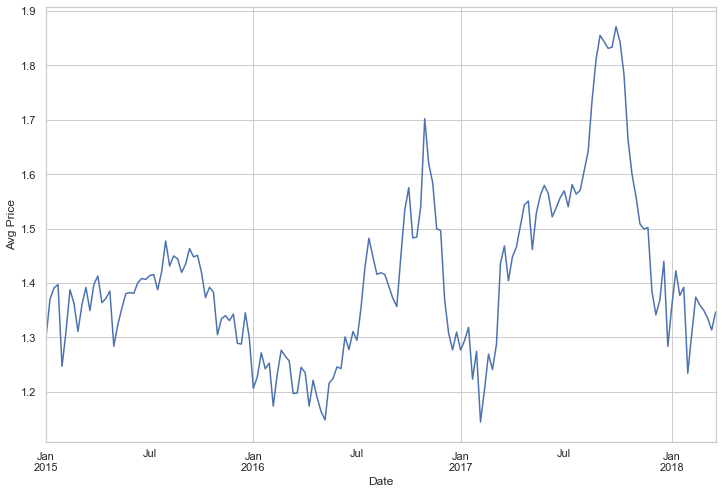

In [11]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['Average Price'].plot()
plt.ylabel('Avg Price')

- From 2015 to 2018, prices seems to increase in the later 6 months of the years.
- Every year a new record is getting created for maximum Average price

### Q2. How the prices are distributed?


In [12]:
dftemp=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv",index_col=0)

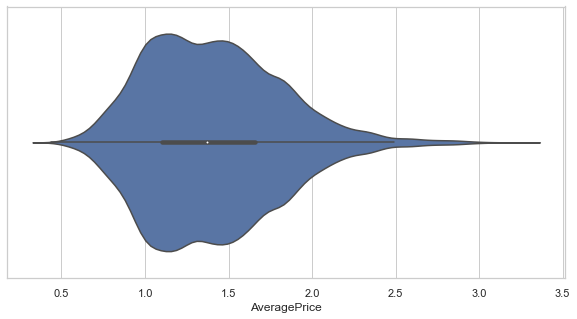

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(dftemp.dropna(subset = ['AveragePrice']).AveragePrice)

- The above violin chart shows how is the weight distribution or spread of the Average price. Let's also plot a distplot for the same.

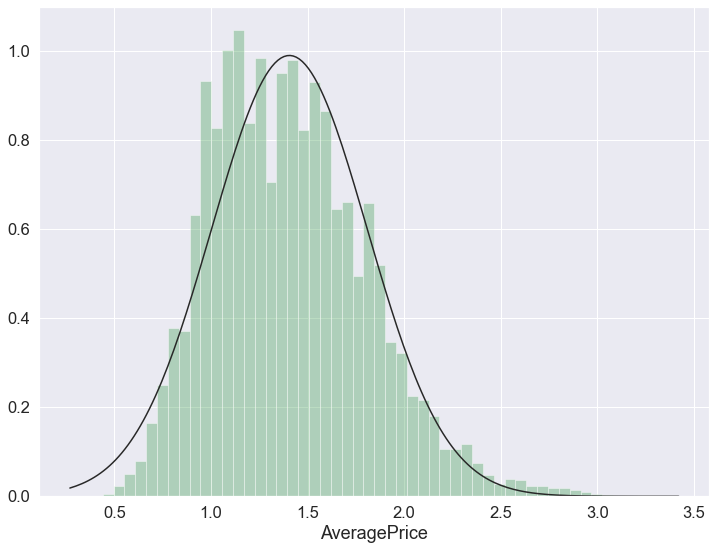

In [17]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(12, 9))
sns.distplot(a=dftemp.AveragePrice, kde=False, fit=norm,color="g")

- Average Price distribution shows that for most cases Average price of Avocado is in the range 1.1 to 1.5 dollars.

### Q3. How dataset features are correlated with each other?

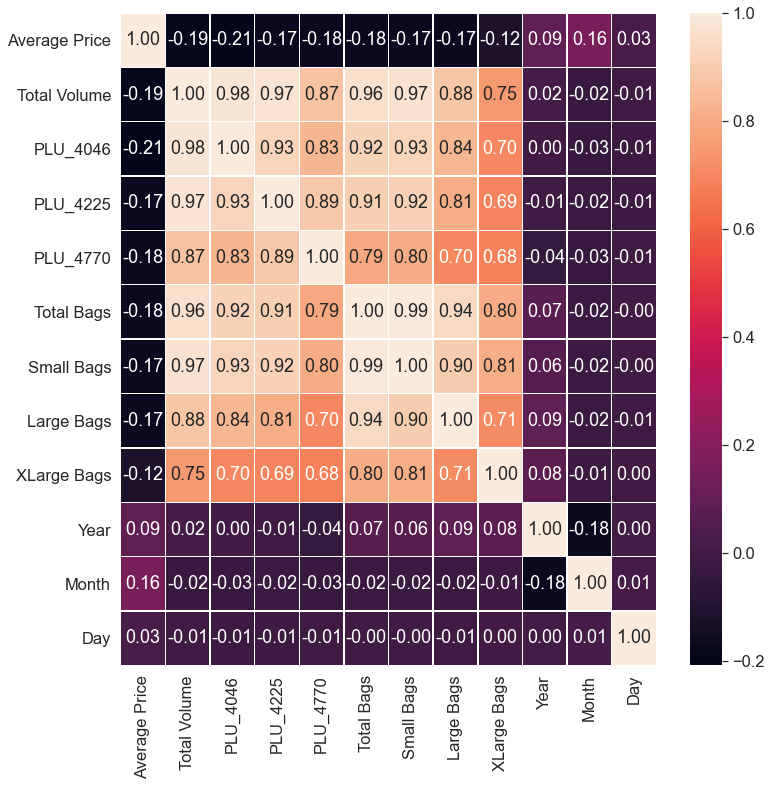

In [18]:
f,axis = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.4, fmt= '.2f',ax=axis)
plt.show()

- As we can observe from the heatmap above, all the features are not corelated with the Average Price column, instead most of them are correlated with each other. So now I am bit worried whether that will help us get a good model. Let's see..

###  Q4. Which are the Top 5 regions where average prices are highest?

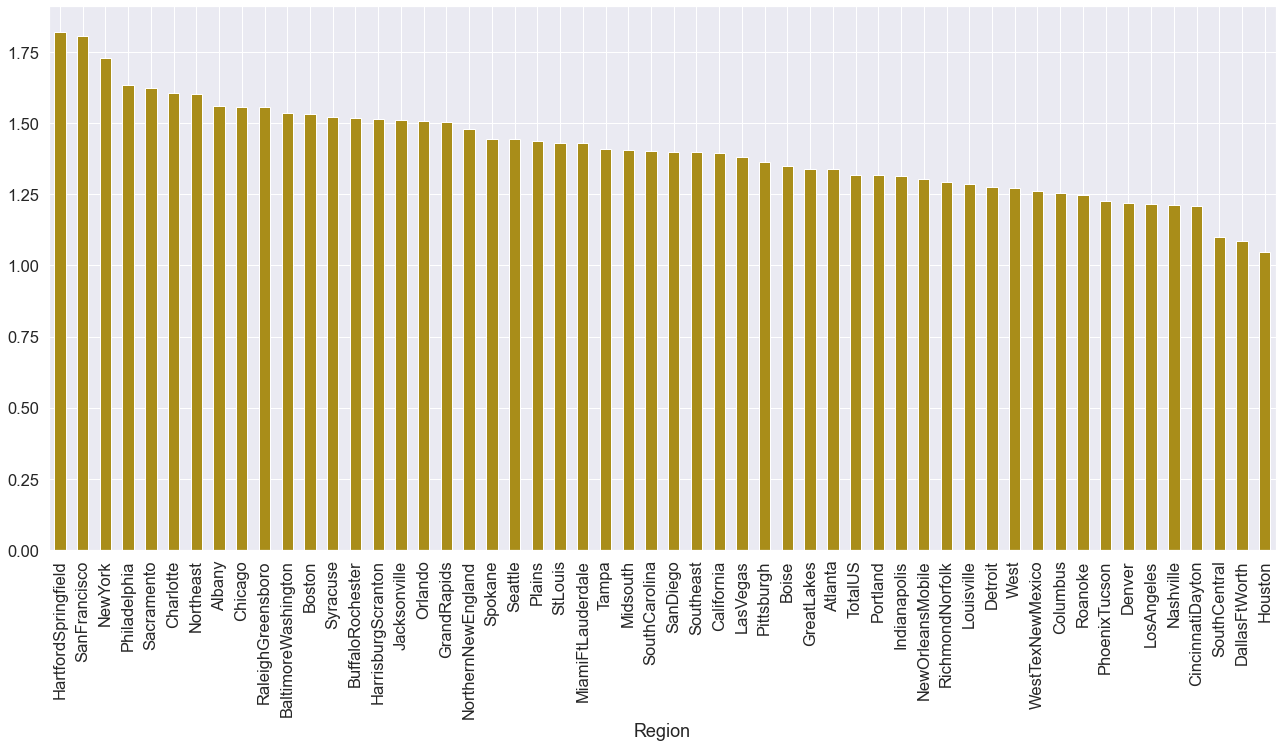

In [51]:
plt.figure(figsize=(22,10))
df.groupby("Region").mean()['Average Price'].sort_values(ascending=False).plot(kind='bar',color='#a98d19')

Looks like the below 5 regions are having the highest Average price:
- HartfordSpringfield
- SanFrancisco
- NewYork
- Philadelphia
- Sacramento

### Q5. Which are Top 5 regions where average consumption of Avocado is highest?

Text(0.5, 1.0, 'Average of Total Volume According to Region')

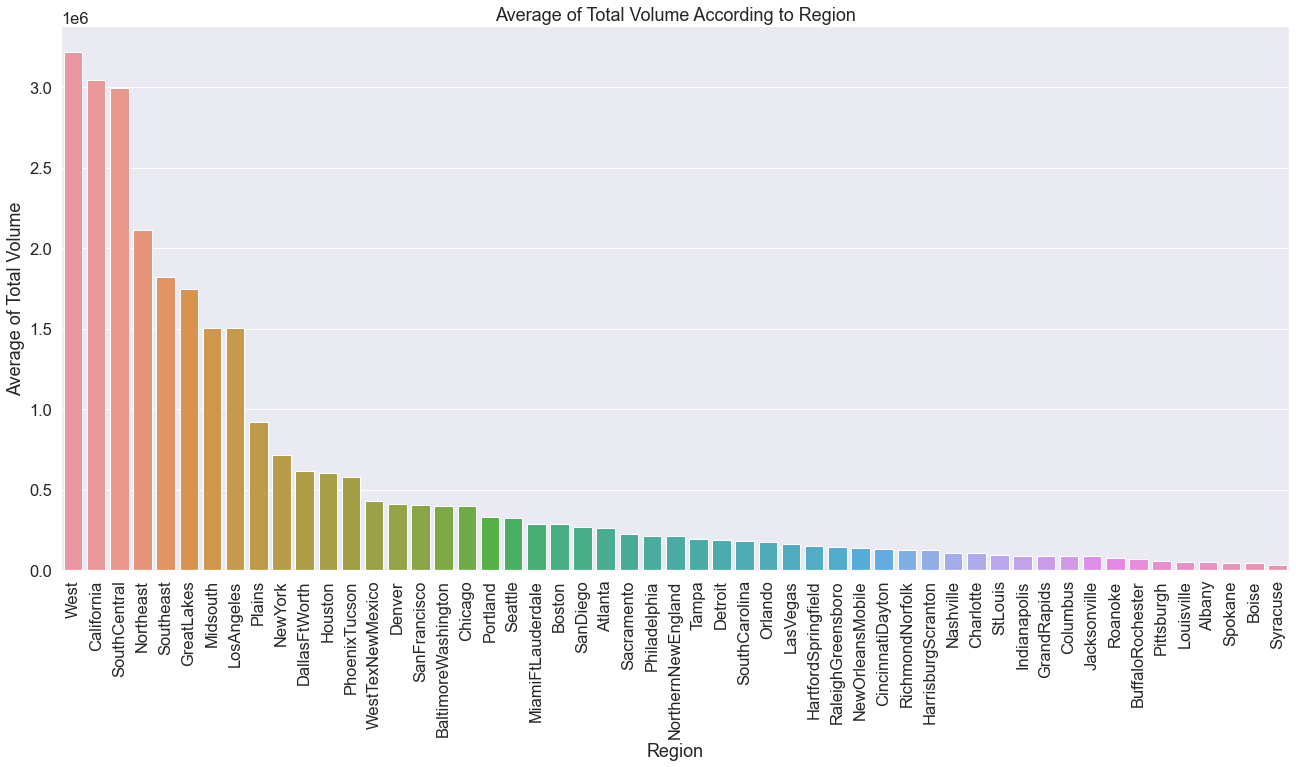

In [52]:
filter1=df.Region!='TotalUS'
df1=df[filter1]

region_list=list(df1.Region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.Region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

Looks like below 5 region are having highest Avacado consumption:

- West
- California
- SouthCentral
- Northeast
- Southeast


###  Q6. In which year and for which region was the average price of Avocado the highest?

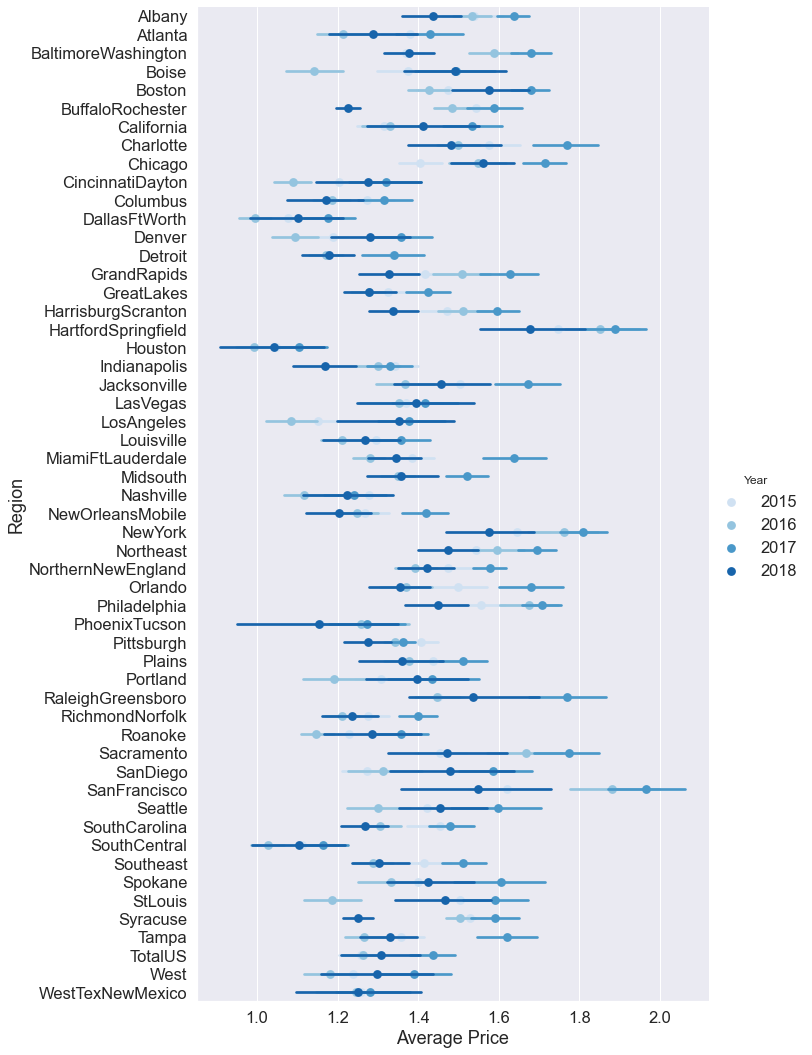

In [53]:
g = sns.factorplot('Average Price','Region',data=df,
                   hue='Year',
                   height=15,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

- Looks like there was a huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region.
- The lowest average price was in Houston in the year 2016.

### Q7. How is the average price distribution in each region by type of Avocado?

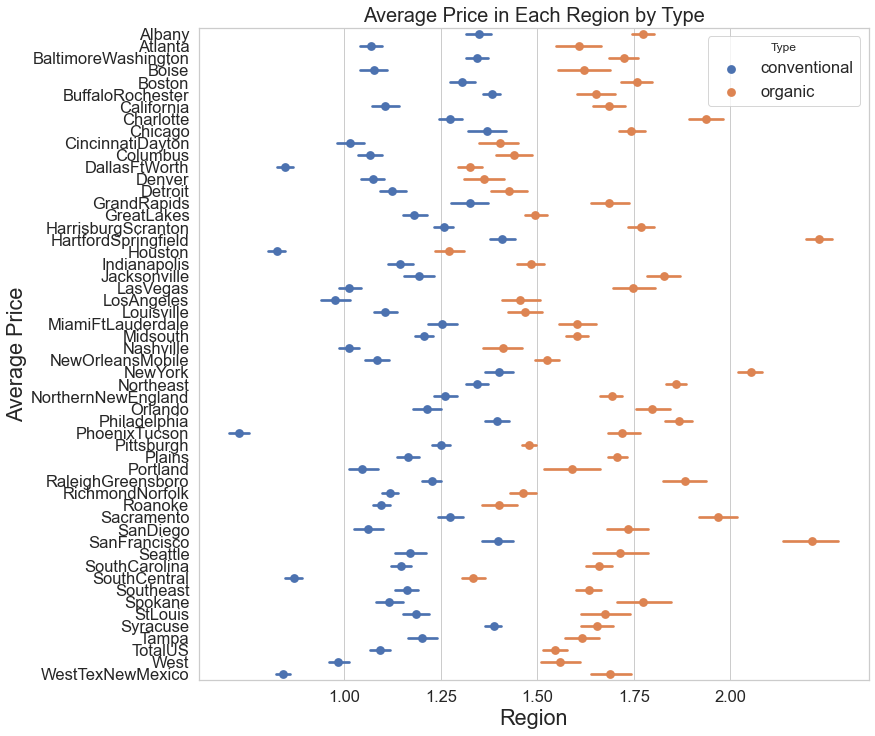

In [54]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.pointplot(x='Average Price',y='Region',data=df, hue='Type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Average Price in Each Region by Type",{'fontsize':20})
plt.rc('ytick', labelsize=18) 

- In this chart, we can see price changes according to type in various regions, Organic Avocados are more expensive than conventional

### Q8. Which Type is costlier in terms of average price?

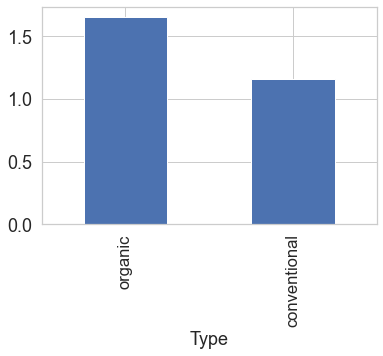

In [55]:
df.groupby("Type").mean()['Average Price'].sort_values(ascending=False).plot(kind='bar')

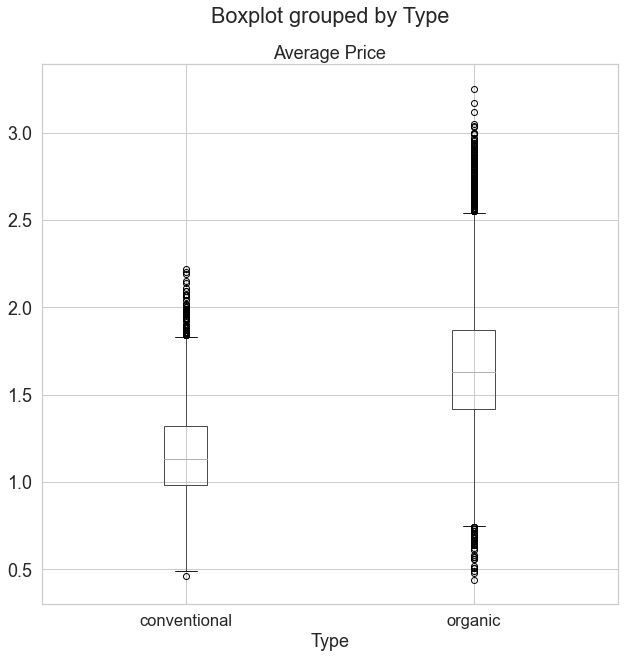

In [56]:
df.boxplot(column = 'Average Price', by = 'Type', figsize = (10,10))
plt.show()

- Average price of Organic Avacados is higher than the convetional ones.

### Q9. Which PLU code Avocados are sold more?

In [57]:
PLU_df=df[['PLU_4046','PLU_4225','PLU_4770']]

In [58]:
PLU_df.shape

(18249, 3)

In [59]:
PLU_df.head()

PLU_4046   PLU_4225  PLU_4770
0   1036.74   54454.85     48.16
1    674.28   44638.81     58.33
2    794.70  109149.67    130.50
3   1132.00   71976.41     72.58
4    941.48   43838.39     75.78

In [60]:
print("Total number of avocados with PLU 4046 sold: ",PLU_df['PLU_4046'].sum())
print("Total number of avocados with PLU 4225 sold: ",PLU_df['PLU_4225'].sum())
print("Total number of avocados with PLU 4770 sold: ",PLU_df['PLU_4770'].sum())

Total number of avocados with PLU 4046 sold:  5347110739.26
Total number of avocados with PLU 4225 sold:  5386275717.93
Total number of avocados with PLU 4770 sold:  416802342.12999994


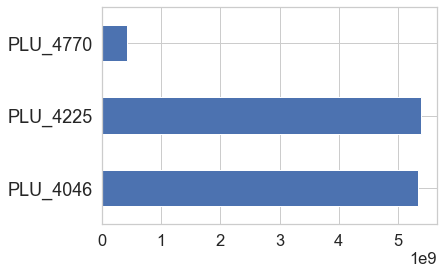

In [61]:
PLU_df.sum().plot(kind='barh')

- Avacados with PLU_Code 4770 are sold least.
- Sales of Avacados with PLU Code 4225 is slightly higher than PLU 4046

###  Q10. Which type of Avocados are more in demand (Conventional or Organic)?


In [15]:
Type=df.groupby('Type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

- Just over 2% of our dataset is organic. So looks like Conventional is in more demand.

### Q11. How prices of Avocado changes by month?

Text(0.5, 1.0, 'Average Price by Month')

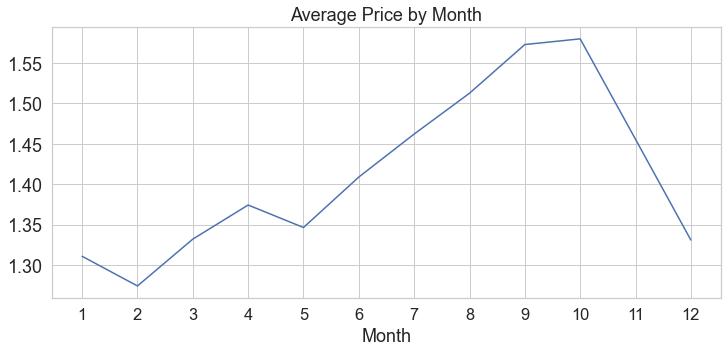

In [63]:
dategroup=df.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) # Manually set x-ticks
dategroup['Average Price'].plot(x=df.Month)
plt.title('Average Price by Month')

- Avacado prices shoots up in the May month and is highest in September-October, it then gradually comes down till December 

### Q12. How average price is distributed over the months for Conventional and Organic Types?

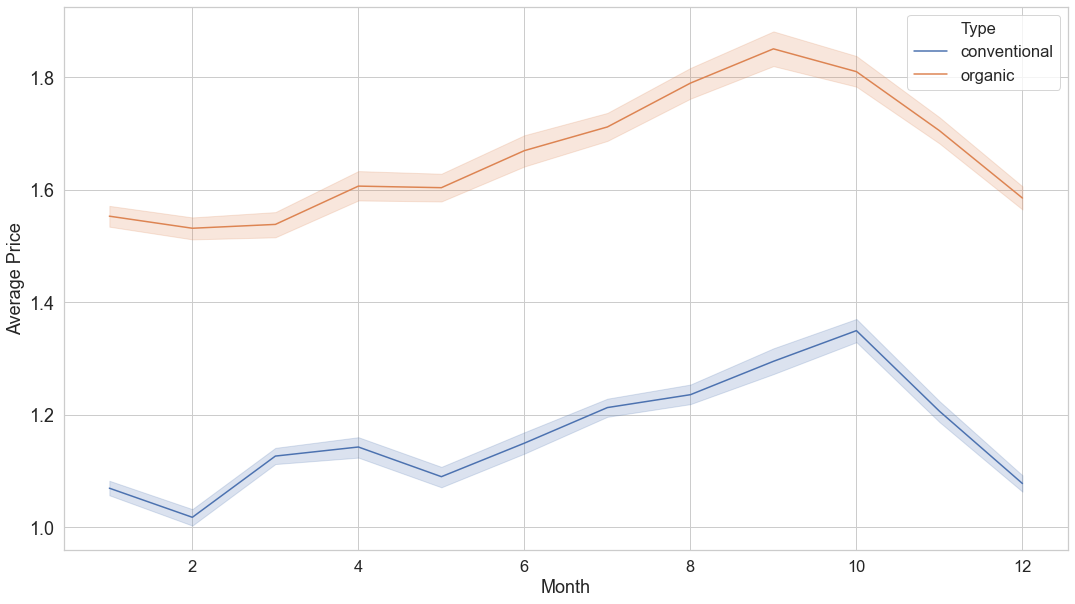

In [64]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="Average Price", hue='Type', data=df)
plt.show()

- Prices for both types is highest in the September-October months.
- Prices of Organic Avacados are always higher than Conventional ones throughout the year

### Q13. How the prices vary by days of month?

Text(0.5, 1.0, 'Average Price by Day')

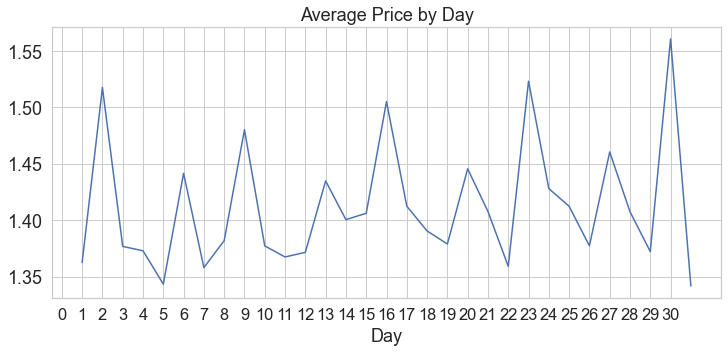

In [65]:
dategroup=df.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,31)) # Manually set x-ticks
dategroup['Average Price'].plot(x=df.Day)
plt.title('Average Price by Day')

- We can observe spikes in prices for somedays of the months. Maybe prices are higher in weekends

### Q14. How average price is distributed over the days of months for Conventional and Organic Types?

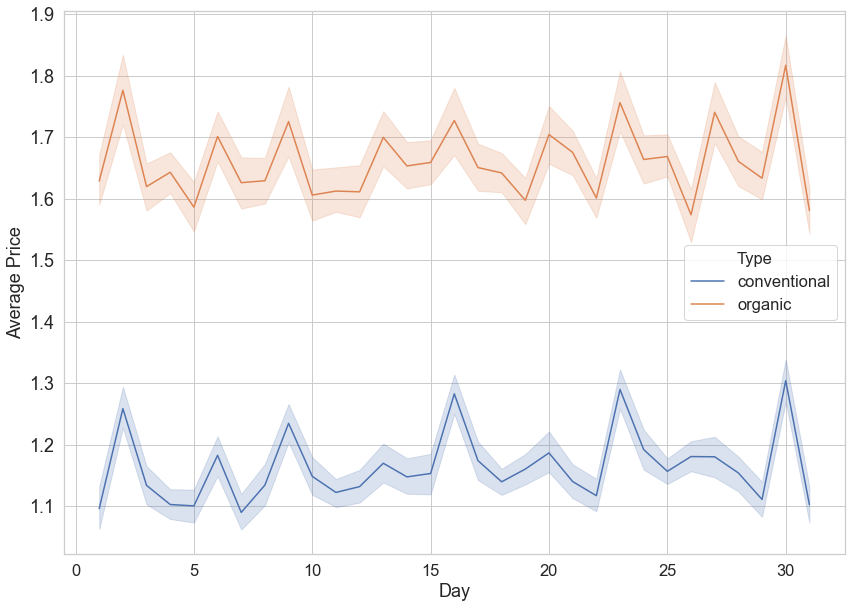

In [66]:
plt.figure(figsize=(14,10))
sns.lineplot(x="Day", y="Average Price", hue='Type', data=df)
plt.show()

- For both types prices increase for some particulaar days, maybe weekends

### Q15. How average price is distributed over Seasons for Conventional and Organic Types?

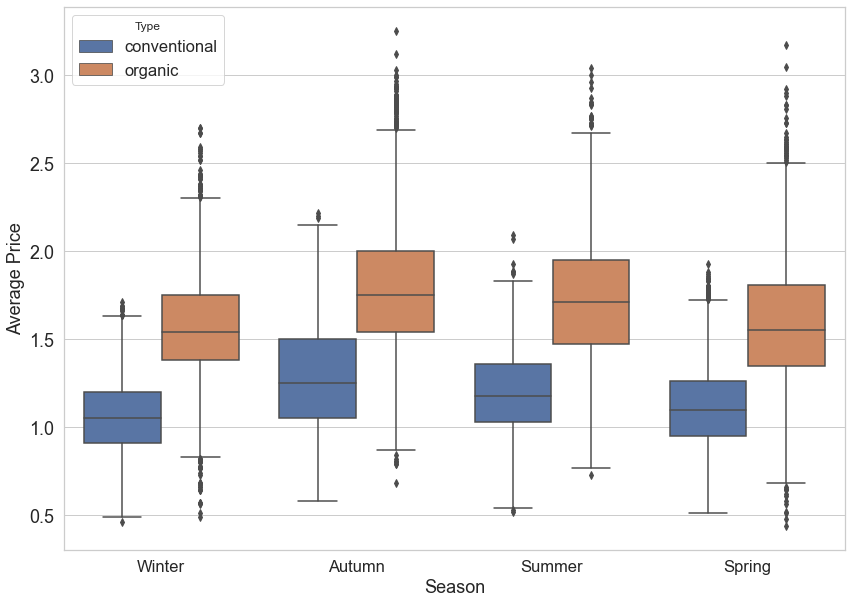

In [67]:
plt.figure(figsize=(14,10))
sns.boxplot(x="Season", y="Average Price", hue='Type', data=df)
plt.show()

- Prices of Avacados are higher in Autumn season for both Conventional and Organic type and throughout the year Convetional Avacados are cheaper than organic ones.

### Q16. How are the average prices  over years and by types?

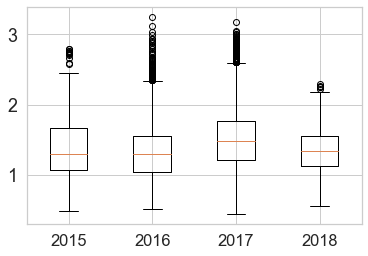

In [68]:
datayear = []
for i in dftemp.year.unique():
    datayear.append(dftemp[dftemp.year == i].AveragePrice)
plt.boxplot(datayear)
plt.xticks(range(1,dftemp.year.nunique()+1),dftemp.year.unique())
plt.show()

- In the year 2017 average price of Avacados was highest compared with 2015,2016 and 2018 years.

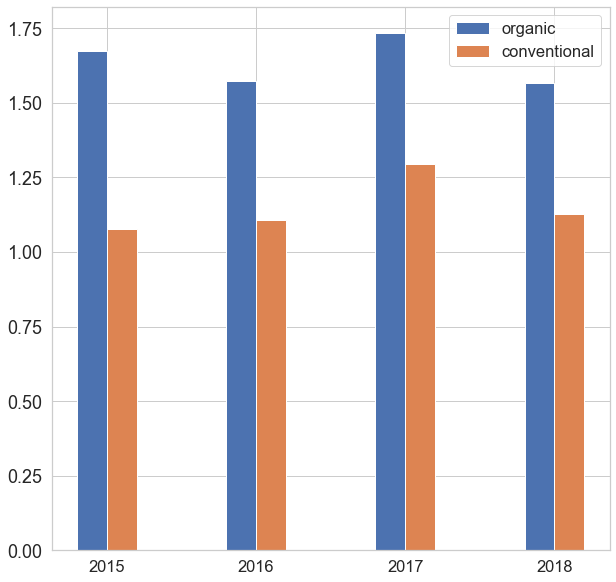

In [139]:
datayearorganic = []
datayearconventional = []
for i in dftemp.year.unique():
    datayearorganic.append(dftemp[(dftemp.year == i) & (dftemp['type'] == 'organic')].AveragePrice.mean())
    datayearconventional.append(dftemp[(dftemp.year == i) & (dftemp.type == 'conventional')].AveragePrice.mean())
bar_width = 0.20
plt.bar(np.arange(dftemp.year.nunique()),datayearorganic,bar_width, label = 'organic')
plt.bar(np.arange(dftemp.year.nunique())+bar_width,datayearconventional,bar_width, label = 'conventional')
plt.xticks(np.arange(dftemp.year.nunique())+bar_width/2,dftemp.year.unique())
plt.legend()
plt.rcParams["figure.figsize"] = (15, 16)
plt.show()



- Average prices were highest in year 2017 for both Conventional and Organic types.

<a name = Section401></a>
## EDA Conclusions

- Every year, prices of avacados are higher in Second half of year, particularly in the September-October month.Prices are increasing year by year. Prices of avacados are higher in Autumn season.
- Most of the Avacados are in the price range 1.0 to 1.5.
- Hart Ford Springfield has highest average price in year 2017. Also, in San Franciso, there was a high rise in prices in year 2016-2017. 
- Organic Avacados are costlier as compared to Conventional ones. But Conventional ones are high in demand may be due to low prices.
- Sales of Avacados with Price Look up code of 4225 are higher.
 

<a name = Section5></a>
# 5. Creating dummies for categorical variables

In [19]:
df['Region'].nunique()

54

In [20]:
df['Type'].nunique()

2

- As we can see we have 54 unique 'Regions' and 2 unique 'Types', so it's going to be easy to transform the 'Type' feature to dummies, but for the 'Region' feature it's going to be a bit complex so I decided to drop the entire column. 

In [21]:
df_final=pd.get_dummies(df.drop(['Region'],axis=1),drop_first=True)

In [22]:
df_final.head()

Date  Average Price  Total Volume  PLU_4046   PLU_4225  PLU_4770  \
0 2015-12-27           1.33      64236.62   1036.74   54454.85     48.16   
1 2015-12-20           1.35      54876.98    674.28   44638.81     58.33   
2 2015-12-13           0.93     118220.22    794.70  109149.67    130.50   
3 2015-12-06           1.08      78992.15   1132.00   71976.41     72.58   
4 2015-11-29           1.28      51039.60    941.48   43838.39     75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  Year  Month  Day  \
0     8696.87     8603.62       93.25          0.0  2015     12   27   
1     9505.56     9408.07       97.49          0.0  2015     12   20   
2     8145.35     8042.21      103.14          0.0  2015     12   13   
3     5811.16     5677.40      133.76          0.0  2015     12    6   
4     6183.95     5986.26      197.69          0.0  2015     11   29   

   Type_organic  Season_Spring  Season_Summer  Season_Winter  
0             0              0              0              1  
1             0              0              0              1  
2             0              0              0              1  
3             0              0              0              1  
4             0              0              0              0

- Now our data is ready! Let's apply our first model which is going to be 'Linear Regression' because our Target variable 'Average Price'is continuous.We will need to first divide our features into 'X' that contains the independent features and 'y'  which contains the target variable or dependent feature.

<a name = Section6></a>
# 6. Splitting X and y into training and test datasets.

- Splitting dataset into X(Explainatory variables) and y(Target variable) column-wise.

In [23]:
X = df_final[ ['Total Volume', 'PLU_4046', 'PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','Year','Month','Day','Type_organic','Season_Spring','Season_Summer','Season_Winter'] ]
y = df_final['Average Price']

In [24]:
print(X.shape)
print(y.shape)

(18249, 15)
(18249,)


- X has independent variables except Average price which we need to predict.

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

- Have splitted the data row-wise into test and training dataset. 

<a name = Section7></a>
# 7. Data Scaling

- Scaling all X columns of to standardize the independent features present in the data in a fixed range to handle highly varying magnitudes or values or units. 


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Total Volume', 'PLU_4046', 'PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','Year','Month','Day','Type_organic','Season_Spring','Season_Summer','Season_Winter']] = scaler.fit_transform(X_train)
X_test[['Total Volume', 'PLU_4046', 'PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','Year','Month','Day','Type_organic','Season_Spring','Season_Summer','Season_Winter']] = scaler.transform(X_test)

In [27]:
X_train.head()

Total Volume  PLU_4046  PLU_4225  PLU_4770  Total Bags  Small Bags  \
2      -0.245397 -0.230237 -0.243326 -0.214369   -0.242629   -0.245094   
13     -0.139340 -0.152215 -0.156342 -0.078814   -0.091821   -0.118423   
22     -0.242160 -0.221052 -0.243506 -0.214369   -0.242930   -0.244181   
25     -0.083880 -0.101570  0.011944 -0.050273   -0.173775   -0.152821   
2      -0.243386 -0.228410 -0.240804 -0.214369   -0.241026   -0.241671   

    Large Bags  XLarge Bags      Year     Month       Day  Type_organic  \
2    -0.217488    -0.177445  0.900933  1.652543  0.149782      1.007080   
13    0.001000    -0.136441  0.900933  1.088244 -1.679108     -0.992969   
22   -0.221485    -0.177445 -1.218764  0.241795  1.178532      1.007080   
25   -0.221485    -0.177445 -1.218764  0.241795 -1.221885     -0.992969   
2    -0.221471    -0.177445  1.960781 -0.886802 -0.536052      1.007080   

    Season_Spring  Season_Summer  Season_Winter  
2       -0.591510      -0.544234       1.588104  
13      -0.591510      -0.544234      -0.629682  
22      -0.591510       1.837444      -0.629682  
25      -0.591510       1.837444      -0.629682  
2        1.690588      -0.544234      -0.629682

In [28]:
X_train.describe()

Total Volume      PLU_4046      PLU_4225      PLU_4770    Total Bags  \
count  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04   
mean  -2.690574e-17  5.475447e-18 -3.837376e-17 -2.209343e-16  1.470766e-17   
std    1.000034e+00  1.000034e+00  1.000034e+00  1.000034e+00  1.000034e+00   
min   -2.459011e-01 -2.302600e-01 -2.437891e-01 -2.143689e-01 -2.438958e-01   
25%   -2.426549e-01 -2.295617e-01 -2.411954e-01 -2.143689e-01 -2.384653e-01   
50%   -2.132846e-01 -2.231798e-01 -2.188480e-01 -2.125501e-01 -2.013712e-01   
75%   -1.177301e-01 -1.403268e-01 -1.178734e-01 -1.551716e-01 -1.269891e-01   
max    1.814294e+01  1.792432e+01  1.691323e+01  2.417639e+01  1.993055e+01   

         Small Bags    Large Bags   XLarge Bags          Year         Month  \
count  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04   
mean   2.250257e-17  9.566824e-18 -7.243561e-18 -8.726680e-14  2.394368e-17   
std    1.000034e+00  1.000034e+00  1.000034e+00  1.000034e+00  1.000034e+00   
min   -2.454578e-01 -2.214855e-01 -1.774450e-01 -1.218764e+00 -1.451101e+00   
25%   -2.414405e-01 -2.209130e-01 -1.774450e-01 -1.218764e+00 -8.868024e-01   
50%   -2.083244e-01 -2.100872e-01 -1.774450e-01 -1.589155e-01 -4.035400e-02   
75%   -1.297235e-01 -1.280201e-01 -1.694710e-01  9.009328e-01  8.060944e-01   
max    1.816825e+01  2.378867e+01  2.640314e+01  1.960781e+00  1.652543e+00   

                Day  Type_organic  Season_Spring  Season_Summer  Season_Winter  
count  1.459900e+04  1.459900e+04   1.459900e+04   1.459900e+04   1.459900e+04  
mean   2.566996e-17  9.195634e-16   1.013825e-15  -3.622161e-16  -4.030386e-16  
std    1.000034e+00  1.000034e+00   1.000034e+00   1.000034e+00   1.000034e+00  
min   -1.679108e+00 -9.929694e-01  -5.915103e-01  -5.442344e-01  -6.296816e-01  
25%   -8.789686e-01 -9.929694e-01  -5.915103e-01  -5.442344e-01  -6.296816e-01  
50%    3.547632e-02 -9.929694e-01  -5.915103e-01  -5.442344e-01  -6.296816e-01  
75%    8.356156e-01  1.007080e+00   1.690588e+00  -5.442344e-01   1.588104e+00  
max    1.750061e+00  1.007080e+00   1.690588e+00   1.837444e+00   1.588104e+00

In [29]:
X_test.head()

Total Volume  PLU_4046  PLU_4225  PLU_4770  Total Bags  Small Bags  \
3      -0.244631 -0.229176 -0.242334 -0.214369   -0.242536   -0.245279   
25     -0.189818 -0.226356 -0.143668 -0.085100   -0.188836   -0.203317   
40      0.061641 -0.146391  0.051818 -0.124087    0.358279    0.102441   
16     -0.243018 -0.230010 -0.240243 -0.214369   -0.238336   -0.242477   
10     -0.241159 -0.229041 -0.241291 -0.207405   -0.232473   -0.230435   

    Large Bags  XLarge Bags      Year     Month       Day  Type_organic  \
3    -0.216549    -0.177445 -1.218764  1.652543 -1.107580      1.007080   
25   -0.133165    -0.107003 -1.218764  0.241795 -1.221885     -0.992969   
40    1.144522    -0.177445 -0.158916 -0.886802  0.492699      1.007080   
16   -0.208167    -0.177445  0.900933  0.806094 -0.650357      1.007080   
10   -0.221276    -0.177445  1.960781 -1.451101 -0.193135      1.007080   

    Season_Spring  Season_Summer  Season_Winter  
3       -0.591510      -0.544234       1.588104  
25      -0.591510       1.837444      -0.629682  
40       1.690588      -0.544234      -0.629682  
16      -0.591510      -0.544234      -0.629682  
10      -0.591510      -0.544234       1.588104

In [30]:
y_train.head()

2     1.79
13    1.84
22    1.14
25    1.26
2     1.90
Name: Average Price, dtype: float64

In [31]:
y_test.head()

3     1.48
25    1.05
40    1.27
16    2.15
10    1.93
Name: Average Price, dtype: float64

<a name = Section8></a>
# 8. Linear Regression Model

In [84]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

- Created object 'lr' of Linear Regression and fitting it into our train dataset.

In [85]:
print('Intercept:',lr.intercept_)                                            
print('Coefficients:',lr.coef_)

Intercept: 1.4034646208638848
Coefficients: [-3.18976305e+02  1.17452838e+02  1.12094354e+02  9.75836638e+00
 -1.99081848e+04  1.51376615e+04  4.96048183e+03  3.55992099e+02
  5.33716867e-02  1.95610584e-02  1.14240512e-02  2.44306605e-01
 -6.70510207e-02 -2.40715584e-02 -9.76441690e-02]


In [86]:
y_pred_train_lr =lr.predict(X_train)
print(y_pred_train_lr)
y_pred_test_lr =lr.predict(X_test)
print(y_pred_test_lr)

[1.63259432 1.32054286 1.66197425 ... 1.51307601 1.73552354 1.07137234]
[1.50507372 1.15317119 1.57378925 ... 1.34724561 1.52264637 1.60329534]


###  Model Evaluation for linear regression model

#### Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [87]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lr)))

MAE: 0.22446669876144787
MSE: 0.08449647311848084
RMSE: 0.290682770591036


- The RMSE is low so we can say that we do have a good model, but lets check to be more sure. Lets plot the y_test vs the predictions

#### R- Square metric

In [88]:
from sklearn.metrics import r2_score
R2_train_lr = r2_score(y_train, y_pred_train_lr) 
R2_test_lr = r2_score(y_test, y_pred_test_lr)

In [89]:
print('R2 for training set is {}'.format(R2_train_lr))
print('R2 for test set is {}'.format(R2_test_lr))

R2 for training set is 0.4629520178786015
R2 for test set is 0.4812557192856629


Y Test      Pred
3     1.48  1.505074
25    1.05  1.153171
40    1.27  1.573789
16    2.15  1.823515
10    1.93  1.624726

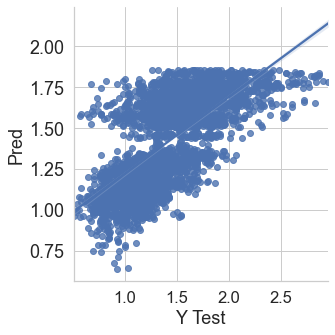

In [90]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_lr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

- As we can see that we dont have a straight line so I am not sure that this is the best model we can apply on our data

#### Adjusted R-Square Metric

Let us develop a Function to calculate the Adjusted R square so that we can call the function anytime during the program

def Adjusted_r2(r_square,P,N)

return(1-(((1-r_square)*(N-1))/(N-P-1)))
Were r_square is the R-Square value
P is the number of independent variables. In this case it is 12.
N is the length of the dependent variables.


In [91]:
def Adjusted_r2(r_square,N): #creating function so that we can call the function again and again
    return(1-(((1-r_square)*(N-1))/(N-13)))

In [92]:
adj_r2_train=Adjusted_r2(R2_train_lr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_lr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.4625101849027715
The Adjusted R-square of Linear Regression Test Dataset is : 0.4795441626817113


<a name = Section9></a>
# 9. Decision Tree

<a name = Section901></a>
## 9.1 Decision Tree Model 1

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)


DecisionTreeRegressor()

- Created object 'dtr' of DecisionTreeRegressor and fitting it into our train dataset.

In [33]:
y_pred_train_dtr=dtr.predict(X_train)
y_pred_test_dtr=dtr.predict(X_test)

Y Test  Pred
3     1.48  1.57
25    1.05  1.07
40    1.27  1.37
16    2.15  2.14
10    1.93  1.62

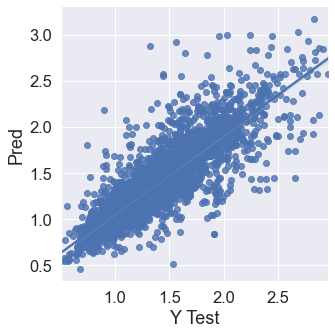

In [34]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_dtr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

- Nice, here we can see that we nearly have a straigt line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE

###  Model Evaluation for Decision Tree Model - 1

#### Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [96]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_dtr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dtr)))

MAE: 0.1373890410958904
MSE: 0.045991808219178074
RMSE: 0.21445700785746796


- Very Nice, our RMSE is lower than the previous one we got with Linear Regression. ok now I am going to try one last model to see if I can improve my predictions for this data which is the RandomForestRegressor

#### R- Square metric

In [97]:
from sklearn.metrics import r2_score
R2_train_dtr = r2_score(y_train, y_pred_train_dtr)
print('R2 for training set is {}'.format(R2_train_dtr))
R2_test_dtr = r2_score(y_test, y_pred_test_dtr)
print('R2 for test set is {}'.format(R2_test_dtr))

R2 for training set is 1.0
R2 for test set is 0.7176451679828622


#### Adjusted R-Square Metric

In [98]:
adj_r2_train=Adjusted_r2(R2_train_dtr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_dtr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 1.0
The Adjusted R-square of Linear Regression Test Dataset is : 0.7167135600685905


<a name = Section902></a>
## 9.2 Decision Tree Model 2

In [99]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse', max_depth=7,
                               max_features=None, max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_impurity_split=None,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, presort=False,
                               random_state=None, splitter='best')
dtr.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=7, presort=False)

- Created object 'dtr' of DecisionTreeRegressor using hyperparameters and fitting it into our train dataset.

In [100]:
y_pred_train_dtr=dtr.predict(X_train)
y_pred_test_dtr=dtr.predict(X_test)

Y Test      Pred
3     1.48  1.670239
25    1.05  1.122042
40    1.27  1.347820
16    2.15  1.875942
10    1.93  1.718567

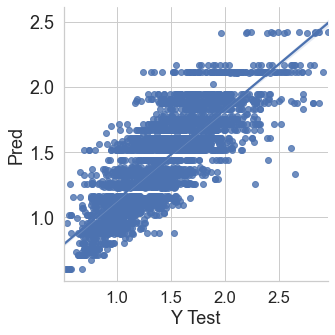

In [101]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_dtr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

###  Model Evaluation for Decision Tree Model - 2

#### Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [102]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_dtr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dtr)))

MAE: 0.17330915826883936
MSE: 0.0522854032898462
RMSE: 0.22866001681502213


#### R- Square metric

In [103]:
from sklearn.metrics import r2_score
R2_train_dtr = r2_score(y_train, y_pred_train_dtr)
print('R2 for training set is {}'.format(R2_train_dtr))
R2_test_dtr = r2_score(y_test, y_pred_test_dtr)
print('R2 for test set is {}'.format(R2_test_dtr))

R2 for training set is 0.7093800315015861
R2 for test set is 0.6790072659787965


#### Adjusted R-Square Metric

In [104]:
adj_r2_train=Adjusted_r2(R2_train_dtr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_dtr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.7091409365048782
The Adjusted R-square of Linear Regression Test Dataset is : 0.6779481752973957


<a name = Section903></a>
## 9.3 Decision Tree Model 3 (with Grid Search CV)

- Creating a gridsearchCV model for DecisionTreeRegressor

In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

decision_tree_regressor= DecisionTreeRegressor(random_state = 0)

max_depth = list(range(2, 60))
max_depth.append('None')

tree_para = [{'max_depth': max_depth,
              'splitter' : ["best", "random"],
              'max_features': ["auto", "log2"] }]
                            
                            

grid_search = GridSearchCV(decision_tree_regressor,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25, 26, 27, 28, 29, 30, 31, ...],
                          'max_features': ['auto', 'log2'],
                          'splitter': ['best', 'random']}],
             refit='AUC')

In [106]:
dtr = grid_search.best_estimator_

- Assigning 'dtr' the best estimator from grid search.

In [107]:
y_pred_train_dtr=dtr.predict(X_train)
y_pred_test_dtr=dtr.predict(X_test)

Y Test      Pred
3     1.48  1.742090
25    1.05  1.050889
40    1.27  1.360000
16    2.15  2.446667
10    1.93  1.492857

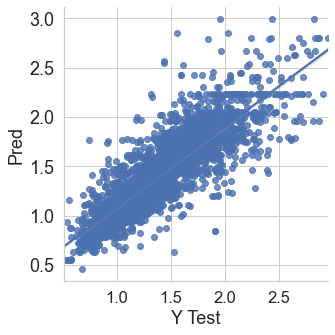

In [108]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_dtr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

###  Model Evaluation for Decision Tree Model - 3

#### Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_dtr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dtr)))

MAE: 0.14456572674108806
MSE: 0.04291231557793723
RMSE: 0.2071528797239788


#### R- Square metric

In [110]:
from sklearn.metrics import r2_score
R2_train_dtr = r2_score(y_train, y_pred_train_dtr)
print('R2 for training set is {}'.format(R2_train_dtr))
R2_test_dtr = r2_score(y_test, y_pred_test_dtr)
print('R2 for test set is {}'.format(R2_test_dtr))

R2 for training set is 0.8814182126344456
R2 for test set is 0.7365509179649425


#### Adjusted R-Square Metric

In [111]:
adj_r2_train=Adjusted_r2(R2_train_dtr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_dtr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.881320654602882
The Adjusted R-square of Linear Regression Test Dataset is : 0.7356816881094516


<a name = Section10></a>
# 10. Random Forest Model

<a name = Section1001></a>
## 10.1 Random Forest Model 1 

In [112]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(random_state = 0)
rdr.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

- Created object 'rdr' of RandomForestRegressor and fitting it into our train dataset.

In [113]:
y_pred_train_rdr=rdr.predict(X_train)
y_pred_test_rdr=rdr.predict(X_test)

###  Model Evaluation for Random Forest Model - 1

#### Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_rdr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_rdr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rdr)))

MAE: 0.10235706849315065
MSE: 0.021703910473972594
RMSE: 0.14732247104217536


- Well as we can see the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

Y Test    Pred
3     1.48  1.6232
25    1.05  1.0604
40    1.27  1.3233
16    2.15  2.0535
10    1.93  1.6322

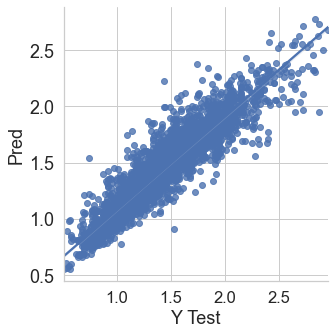

In [115]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_rdr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

#### R- Square metric

In [116]:
R2_train_rdr = r2_score(y_train, y_pred_train_rdr)
R2_test_rdr = r2_score(y_test, y_pred_test_rdr)

In [117]:
print('R2 for training set is {}'.format(R2_train_rdr))
print('R2 for test set is {}'.format(R2_test_rdr))

R2 for training set is 0.9822027817779774
R2 for test set is 0.8667544453397217


#### Adjusted R-Square Metric

In [118]:
adj_r2_train=Adjusted_r2(R2_train_rdr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_rdr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.9821881398872148
The Adjusted R-square of Linear Regression Test Dataset is : 0.8663148119451868


<a name = Section1002></a>
## 10.2 Random Forest Model 2

In [119]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)
rdr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=15, random_state=0)

- Created object 'rdr' of RandomForestRegressor with hyper parameters and fitting it into our train dataset.

In [120]:
y_pred_train_rdr=rdr.predict(X_train)
y_pred_test_rdr=rdr.predict(X_test)

###  Model Evaluation for Random Forest Model - 2

#### Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [121]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_rdr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_rdr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rdr)))

MAE: 0.108297899543379
MSE: 0.023982116407914762
RMSE: 0.15486160404669314


Y Test      Pred
3     1.48  1.681333
25    1.05  1.072667
40    1.27  1.314667
16    2.15  2.142000
10    1.93  1.614000

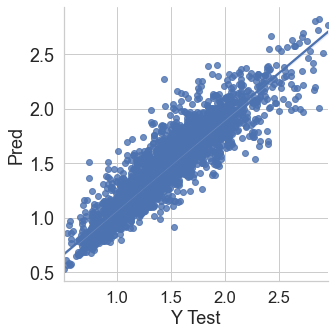

In [122]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_rdr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

#### R- Square metric

In [123]:
R2_train_rdr = r2_score(y_train, y_pred_train_rdr)
R2_test_rdr = r2_score(y_test, y_pred_test_rdr)

In [124]:
print('R2 for training set is {}'.format(R2_train_rdr))
print('R2 for test set is {}'.format(R2_test_rdr))

R2 for training set is 0.9764057275813068
R2 for test set is 0.8527679882142882


#### Adjusted R-Square Metric

In [125]:
adj_r2_train=Adjusted_r2(R2_train_rdr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_rdr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.976386316415187
The Adjusted R-square of Linear Regression Test Dataset is : 0.8522822075870051


<a name = Section1003></a>
## 10.3 Random Forest Model 3 (with Grid search CV)

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV

max_depth = list(range(2, 30))
max_depth.append('None')

# specify parameters and distributions to sample from
param_dist = {"max_depth": max_depth,
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "n_estimators": [100, 400, 700, 1000, 1500],
              'max_features': ["auto", "log2"]
             }
# run randomized search
n_iter_search = 30
random_search = RandomizedSearchCV(rdr, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

- Fitting the model to our train dataset.

In [127]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(n_estimators=15,
                                                   random_state=0),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 'None'],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC2F59ED60>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC30DA6B20>,
                                        'n_estimators': [100, 400, 700, 1000,
               

In [128]:
rdrcv = random_search.best_estimator_

In [129]:
y_pred_train_rdr=rdrcv.predict(X_train)
y_pred_test_rdr=rdrcv.predict(X_test)

###  Model Evaluation for Random Forest Model - 3

#### Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [130]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_rdr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_rdr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rdr)))

MAE: 0.10260760980048722
MSE: 0.02171269402439485
RMSE: 0.14735227865355477


Y Test      Pred
3     1.48  1.640865
25    1.05  1.055304
40    1.27  1.311071
16    2.15  2.055894
10    1.93  1.614473

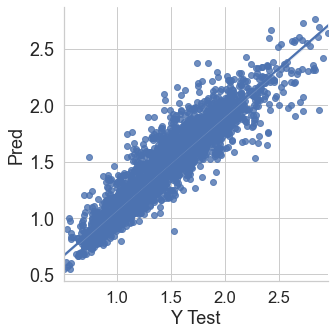

In [131]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_rdr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

#### R- Square metric

In [132]:
R2_train_rdr = r2_score(y_train, y_pred_train_rdr)
R2_test_rdr = r2_score(y_test, y_pred_test_rdr)

In [133]:
print('R2 for training set is {}'.format(R2_train_rdr))
print('R2 for test set is {}'.format(R2_test_rdr))

R2 for training set is 0.9782754958575782
R2 for test set is 0.8667005209997137


#### Adjusted R-Square Metric

In [134]:
adj_r2_train=Adjusted_r2(R2_train_rdr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_rdr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.9782576229623562
The Adjusted R-square of Linear Regression Test Dataset is : 0.8662607096859927


<a name = Section11></a>
# 11. Model Evaluation Results

| Model                       |	MAE | MSE | RMSE | R-Sq | Adj R-Sq |
|-----------------------------|-----|-----|-----|-----|-----|
| Linear Regression	      |0.224|0.084|0.290|0.481|0.479|
| Decision Tree Model 1       |0.137|0.045|0.214|0.717|0.716|                                 
| Decision Tree Model 2       |0.173|0.052|0.228|0.679|0.677|    
| Decision Tree Model 3 (GSCV)|0.144|0.042|0.207|0.736|0.735|                              
| Random Forest Model 1       |0.102|0.021|0.147|0.8667|0.8663|                   
| Random Forest Model 2       |0.108|0.023|0.154|0.852|0.852|
| Random Forest Model 3 (GSCV)|0.102|0.021|0.147|0.8667|0.8662|                  


<a name = Section12></a>
# 12. Conclusions

- As per the Model Evaluation results section, it is clear that Random Forest Model 1 is giving the best Prediction Results and Random Forest Model 3 is not far behind and also giving equally good prediction results compared to other models used.